# Investigation of the polynomial fitting method for density-to-enthalpy conversion

This notebook investigates the polynomial fitting method for the density-to-enthalpy conversion. 

This method involves using the _NumPy_ functions `polyfit` and `polyval` to build a polynomial from a dataset. 
`polyval` is chosen because it is considered to be sufficiently efficient due to its use of the Horner scheme.

Time effort and accuracy of this method are usually impacted by the polynomial degree. For this reason, this evaluation focuses on finding the polynomial degree that allows users to get the best compromise between time effort and accuracy. The analysis is performed for all coolant materials: _lead_, _LBE_, _bismuth_, _sodium_, and _NaK_.

The procedure is identical for all materials and follows these steps:

- **Database generation:** A database of densities and corresponding enthalpies is generated using coolant-specific correlations. Both properties are computed over the same temperature range, which corresponds to the smallest common validity range between the density and enthalpy correlations. The database is sized to provide a 0.1 K interval between successive temperature points.

- **Reference database:** A reference database is required to assess the accuracy of the method. It consists of 5000 data points, which is considered a sufficient amount to gather a consistent result.

- **Polynomial degree:** Polynomials of progressively increasing degree are fitted and tested against the reference dataset.

In [1]:
import numpy as np
import os
from auxiliary import generate_database, eval_poly, plot_polynomial_results
from _commons import ENTHALPY_RANGE, PATH_TO_DATA, DATA_EXTENSION, \
    REFERENCE_SUFFIX

## Database generation
Databases are generated by the function _generate_database_ imported from the _auxiliary_ module, and stored in the _data_ folder. First the datasets for polynomial fitting are generated, then the reference ones. 

In [2]:
for material in ENTHALPY_RANGE:
    generate_database(material)
    generate_database(material, reference=True)

## Polynomial degree
In this section, polynomials are built fitting the previously constructed dataset. The _NumPy_ functions `polyfit` and `polyval` are used.

According to the _numpy.polyfit_ documentation page (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), the polynomial coefficients' fitting may be badly conditioned when the degree of the polynomial is large. When this happens, a RankWarning is issued. 

----------------------------------------

Fitting and evaluating polynomials for lead...
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degree 3...
Evaluating polynomium degree 4...
Evaluating polynomium degree 5...
Evaluating polynomium degree 6...
Evaluating polynomium degree 7...
Polynomial degree 7 issues a NumPy RankWarning.
Polynomial coefficients for degree 6:
[ 1.02128393e-16 -5.83472433e-12  1.38922065e-07 -1.76674102e-03  1.26732014e+01 -4.87795477e+04  7.94150679e+07]
----------------------------------------

Fitting and evaluating polynomials for LBE...
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degree 3...
Evaluating polynomium degree 4...
Evaluating polynomium degree 5...
Evaluating polynomium degree 6...
Evaluating polynomium degree 7...
Evaluating polynomium degree 8...
Polynomial degree 8 issues a NumPy RankWarning.
Polynomial coefficients for degree 7:
[ 6.87222788e-20 -4.5085353

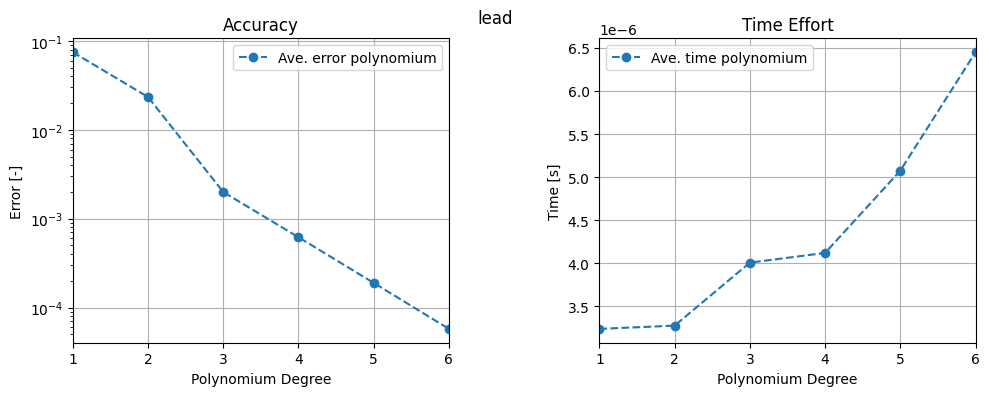

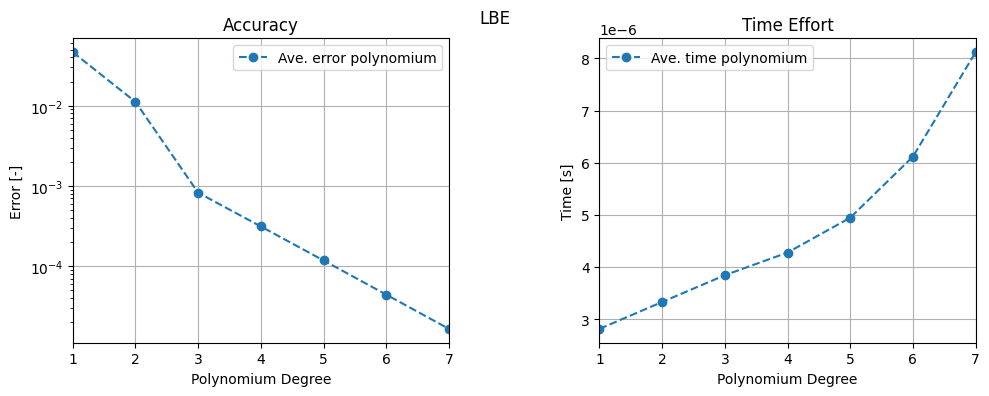

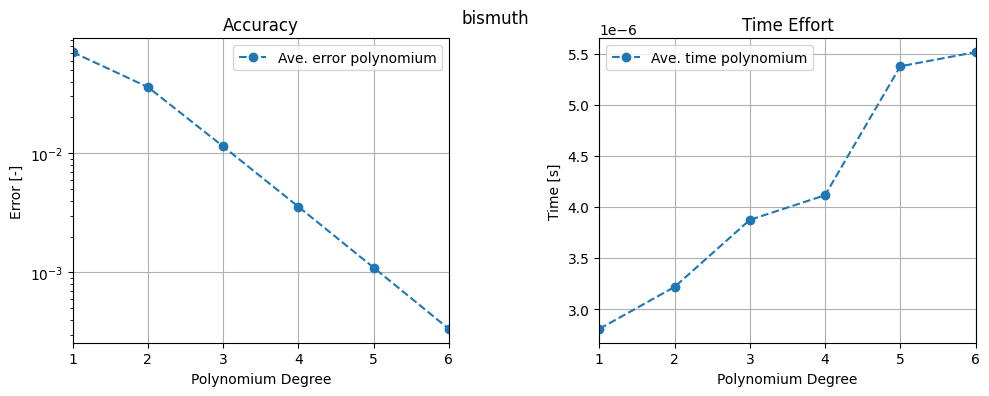

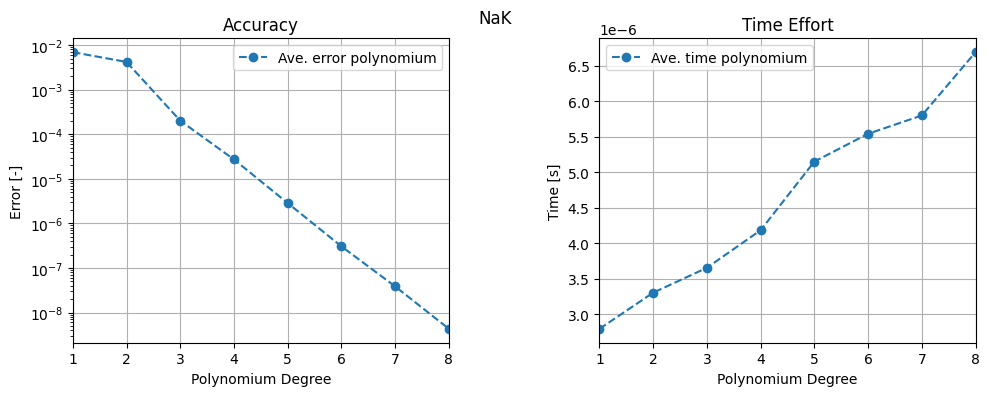

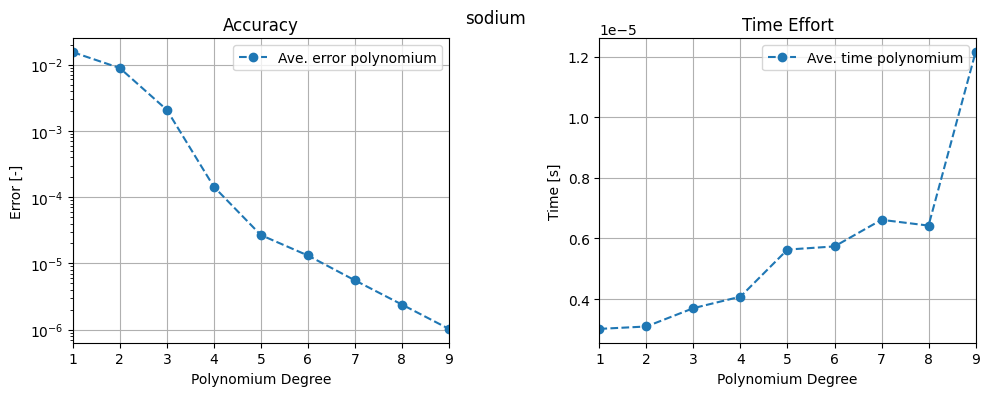

In [3]:
for material in ENTHALPY_RANGE:
    print('----------------------------------------')
    print(f'\nFitting and evaluating polynomials for {material}...')
    reference_data = np.genfromtxt(os.path.join(PATH_TO_DATA, material + 
                                          REFERENCE_SUFFIX + DATA_EXTENSION), 
                                   delimiter=',')
    data4fit = np.genfromtxt(os.path.join(PATH_TO_DATA, material + 
                                          DATA_EXTENSION), delimiter=',')
    
    poly_res, max_deg = eval_poly(reference_data, data4fit)
    plot_polynomial_results(poly_res, material, max_deg)

# Conclusions

Polynomials of diverse degrees have been fitted using a dataset constructed through reference correlation functions. 
The following _Table_ summarizes the results for each material. The polynomial degree reported in the second column is the one providing the best compromise between accuracy and time effort, and is the one that will be employed in the code. 

Order of accuracy and order of time effort refer to the order of magnitude of the average error and time effort.

| Material | Polynomial degree | Order of accuracy | Order of time effort [s] |
| -------- | ----------------- | ----------------- | ------------------------ |
| Lead     | 6                 | $10^{-5}$         | $10^{-6}$                |
| LBE      | 7                 | $10^{-5}$         | $10^{-6}$                |
| Bismuth  | 6                 | $10^{-4}$         | $10^{-6}$                |
| NaK      | 8                 | $10^{-9}$         | $10^{-6}$                |
| Sodium   | 9                 | $10^{-6}$         | $10^{-5}$                |
